# Well Log plot - Plotly

# Importing the libraries

In [1]:
import pandas as pd
import numpy  as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans

In [2]:
pwd

'/home/ehgeraldo/repos/Well_Logs_Plots'

In [3]:
ls -l

total 9496
-rw-rw-r-- 1 ehgeraldo ehgeraldo  479237 ago 29 22:33 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  170188 set  8 22:42 c10.10-ehgeraldo_well_locations.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  668515 set 18 18:55 c11.11-ehgeraldo_Clustering_Methods.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95981 ago 29 22:34 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  398435 ago 29 22:37 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395869 ago 29 22:43 c3.3-ehgeraldo_matplotlib_subplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplotlib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201759 set  2 20:30 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247070 set  2 20:29 c6.6-ehgeraldo_matplotlib_subplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  803836 set  2 20:29 c7.7-ehgeraldo_well_locations.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  217362 set  2 20:28 c8.8-ehgeraldo_well_boxpl

In [8]:
 df_raw = lasio.read('/home/ehgeraldo/repos/Well_Logs_Plots/data/15-9-19_SR_COMP.LAS').df()

In [9]:
df_raw.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


In [10]:
#df_raw = pd.read_csv('https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/hidden_test.csv', sep=';')

# Data descrition

In [11]:
df1 = df_raw.copy()

## Data dimensions

In [12]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 6701
Number of cols: 7


## Data types

In [13]:
df1.dtypes

AC      float64
CALI    float64
DEN     float64
GR      float64
NEU     float64
RDEP    float64
RMED    float64
dtype: object

## Check NAs 

In [14]:
df1.isna().sum() 

AC      122
CALI    122
DEN      45
GR       12
NEU      33
RDEP      0
RMED      0
dtype: int64

In [15]:
df1.isna().sum() /len(df_raw)

AC      0.018206
CALI    0.018206
DEN     0.006715
GR      0.001791
NEU     0.004925
RDEP    0.000000
RMED    0.000000
dtype: float64

In [16]:
df1.sample().T

DEPT,4388.5592
AC,89.7374
CALI,8.9524
DEN,2.3333
GR,51.9418
NEU,25.7891
RDEP,0.7269
RMED,0.8301


## Replace NAs

In [17]:
df1 = df1.dropna()

In [18]:
df1.shape

(6579, 7)

In [19]:
print('Removed data: {:.2f}%'.format( 1-( df1.shape[0] / df_raw.shape[0] ) ) )

Removed data: 0.02%


In [20]:
df1.isna().sum()

AC      0
CALI    0
DEN     0
GR      0
NEU     0
RDEP    0
RMED    0
dtype: int64

## Data Describe

In [21]:
df1.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000
mean,78.313607,9.550656,2.459512,35.814045,17.989428,3.257043,3.117874
std,17.009535,0.906267,0.163524,26.848476,11.770996,8.937792,6.358822
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,66.169300,9.142900,2.339150,14.567300,10.156650,0.794950,0.846850
50%,74.145900,9.523800,2.515400,31.706400,15.158800,1.813600,1.849500
75%,89.024250,9.904800,2.590450,50.767000,23.103300,3.406250,3.587400
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


## Descriptive Statistical

In [22]:
num_attributes = df1.select_dtypes('float64')

In [23]:
num_attributes.sample(2)

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
4593.6896,39.6250,9.619,2.4856,54.8839,15.0451,1.6912,1.6599
3853.3304,72.9705,10.000,2.4627,5.7717,13.8031,1.7401,2.0839


## Numerical Attributes

In [24]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [25]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,AC,1.0251,149.2187,148.1936,78.313607,74.1459,17.008242,0.568821,0.188815
1,CALI,6.0000,20.2857,14.2857,9.550656,9.5238,0.906198,1.356733,26.107515
2,DEN,2.0377,3.0013,0.9636,2.459512,2.5154,0.163511,-0.781671,-0.601550
3,GR,2.7661,304.3337,301.5676,35.814045,31.7064,26.846435,3.532985,26.981597
4,NEU,2.1783,146.3474,144.1691,17.989428,15.1588,11.770101,2.309390,9.358745
5,RDEP,0.2503,198.5371,198.2868,3.257043,1.8136,8.937113,12.823084,189.866496
6,RMED,0.2947,115.6350,115.3403,3.117874,1.8495,6.358339,10.275765,128.518434


## Data transform

In [26]:
scaler = StandardScaler()

In [27]:
df1.columns

Index(['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED'], dtype='object')

In [28]:
df1[['AC_T', 'CALI_T', 'DEN_T', 'GR_T', 'NEU_T', 'RDEP_T', 'RMED_T']] = scaler.fit_transform(df1[['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED']])

In [29]:
df1

,AC,CALI,DEN,GR,NEU,RDEP,RMED,AC_T,CALI_T,DEN_T,GR_T,NEU_T,RDEP_T,RMED_T
DEPT,,,,,,,,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359,1.027831,3.502816,-0.713177,0.710014,2.258670,-0.264397,-0.358895
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028,0.935611,3.360684,-0.652630,0.659371,3.748555,-0.282009,-0.364100
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958,1.352979,4.648592,-0.871576,0.490428,4.581037,-0.292571,-0.365201
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929,1.249606,5.268435,-1.229350,0.032114,2.286248,-0.290915,-0.365657
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940,1.310123,1.757060,-1.521073,0.173176,2.683492,-0.281169,-0.365484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617.3116,40.0000,6.0000,2.5547,87.1958,15.4080,2.6787,2.1338,-2.252649,-3.918190,0.582148,1.913914,-0.219321,-0.064713,-0.154769
4617.4640,40.0000,6.0000,2.5662,90.9071,15.8777,2.6239,2.0865,-2.252649,-3.918190,0.652480,2.052155,-0.179415,-0.070844,-0.162208
4617.6164,40.0000,6.0000,2.5702,86.2190,15.8576,2.5898,2.0461,-2.252649,-3.918190,0.676943,1.877529,-0.181122,-0.074660,-0.168562


# Clustering the data

In [41]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans  = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

# Generate the elbow plot

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34dde47b80>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

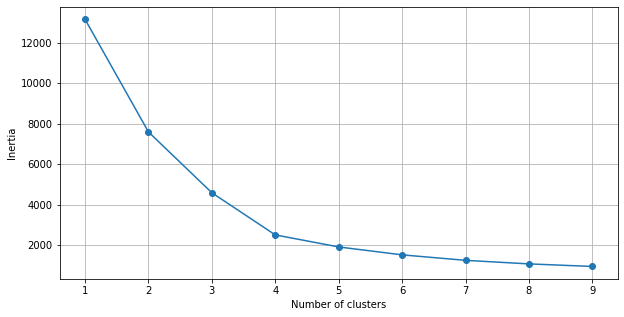

In [42]:
optimise_k_means(df1[['DEN_T','GR_T']],10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34d9a4ad30>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

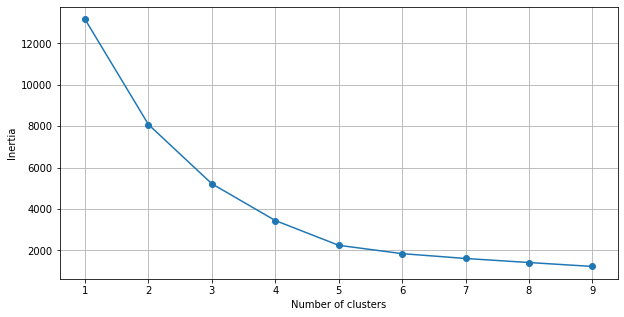

In [48]:
optimise_k_means(df1[['GR_T','NEU_T']],10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34d6f6fe50>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

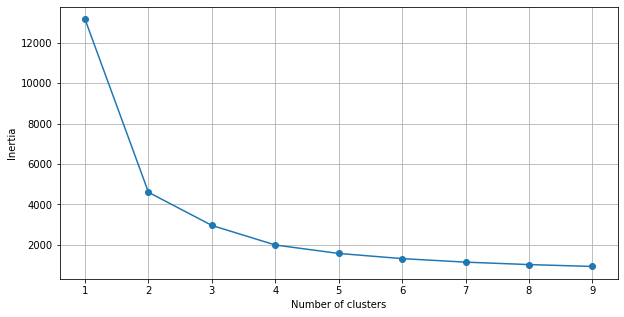

In [82]:
optimise_k_means(df1[['DEN_T','NEU_T']],10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34dde47af0>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

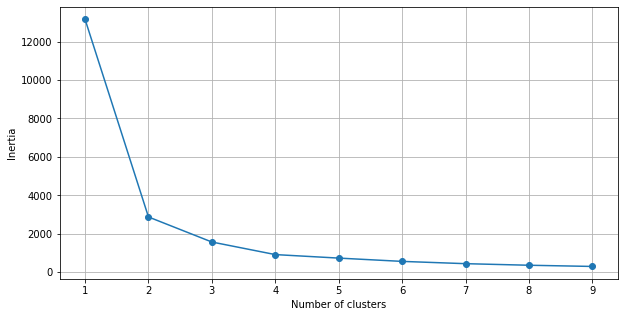

In [45]:
optimise_k_means(df1[['RDEP_T', 'RMED_T']],10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34d9a0b040>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

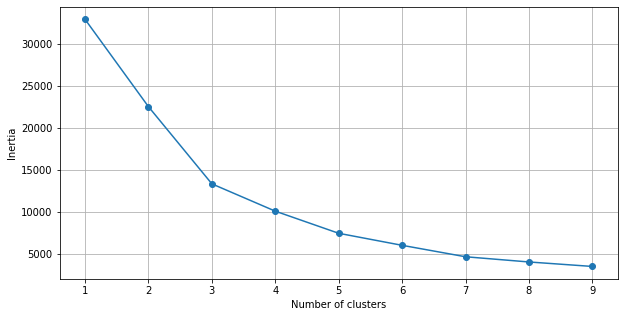

In [49]:
optimise_k_means(df1[['DEN_T', 'GR_T', 'NEU_T', 'RDEP_T', 'RMED_T']],10)

# Applying K Means Clustering

In [50]:
kmeans = KMeans(n_clusters=4)

In [67]:
kmeans.fit(df1[['DEN_T', 'GR_T', 'NEU_T', 'RDEP_T', 'RMED_T']])

KMeans(n_clusters=4)

In [52]:
df1['kmeans_4'] = kmeans.labels_

In [53]:
df1

,AC,CALI,DEN,GR,NEU,RDEP,RMED,AC_T,CALI_T,DEN_T,GR_T,NEU_T,RDEP_T,RMED_T,kmeans_4
DEPT,,,,,,,,,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359,1.027831,3.502816,-0.713177,0.710014,2.258670,-0.264397,-0.358895,0
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028,0.935611,3.360684,-0.652630,0.659371,3.748555,-0.282009,-0.364100,0
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958,1.352979,4.648592,-0.871576,0.490428,4.581037,-0.292571,-0.365201,0
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929,1.249606,5.268435,-1.229350,0.032114,2.286248,-0.290915,-0.365657,0
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940,1.310123,1.757060,-1.521073,0.173176,2.683492,-0.281169,-0.365484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617.3116,40.0000,6.0000,2.5547,87.1958,15.4080,2.6787,2.1338,-2.252649,-3.918190,0.582148,1.913914,-0.219321,-0.064713,-0.154769,1
4617.4640,40.0000,6.0000,2.5662,90.9071,15.8777,2.6239,2.0865,-2.252649,-3.918190,0.652480,2.052155,-0.179415,-0.070844,-0.162208,1
4617.6164,40.0000,6.0000,2.5702,86.2190,15.8576,2.5898,2.0461,-2.252649,-3.918190,0.676943,1.877529,-0.181122,-0.074660,-0.168562,1


# Plotting the Results

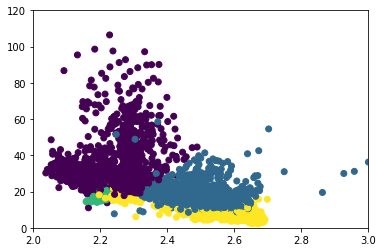

In [65]:
plt.scatter(x=df1['DEN'], y=df1['NEU'], c=df1['kmeans_4'])
plt.xlim(2,3)
plt.ylim(0,120)
plt.show()

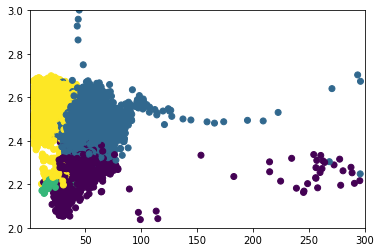

In [66]:
plt.scatter(x=df1['GR'], y=df1['DEN'], c=df1['kmeans_4'])
plt.xlim(1,300)
plt.ylim(2,3)
plt.show()

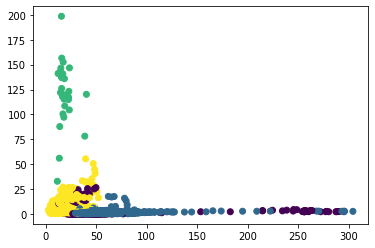

In [59]:
plt.scatter(x=df1['GR'], y=df1['RDEP'], c=df1['kmeans_4'])
plt.show()

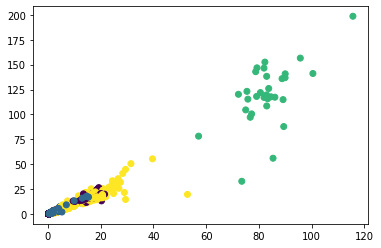

In [60]:
plt.scatter(x=df1['RMED'], y=df1['RDEP'], c=df1['kmeans_4'])
plt.show()

# Creating Multiple Clusters

In [88]:
for k in range(1, 5):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1[['DEN_T','NEU_T']])
    df1[f'KMeans_{k}'] = kmeans.labels_
    

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34d6a38670>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

In [89]:
df1.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED,AC_T,CALI_T,DEN_T,...,Kmeans_1,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPT,,,,,,,,,,,,,,,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359,1.027831,3.502816,-0.713177,...,0,0,2,1,2,0,0,0,2,4
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028,0.935611,3.360684,-0.652630,...,0,0,2,1,2,0,0,0,2,4
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958,1.352979,4.648592,-0.871576,...,0,0,2,1,2,0,0,0,2,4
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929,1.249606,5.268435,-1.229350,...,0,0,2,1,2,0,0,0,2,4
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940,1.310123,1.757060,-1.521073,...,0,0,2,1,2,0,0,0,2,4


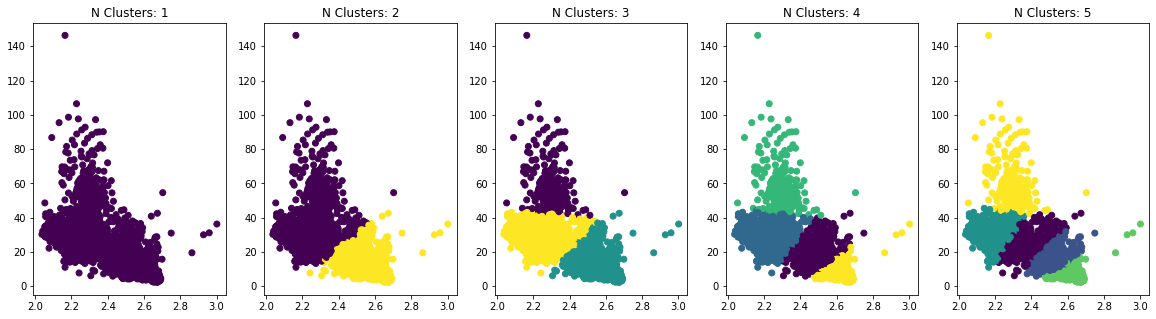

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df1['DEN'], y=df1['NEU'], c=df1[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

In [92]:
for k in range(1, 5):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1[['DEN_T','GR_T']])
    df1[f'KMeans_{k}'] = kmeans.labels_
    

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34d4fc4af0>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

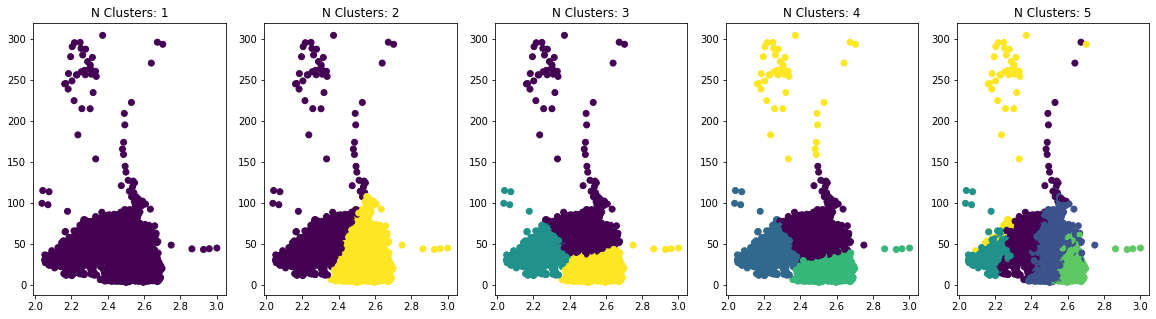

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df1['DEN'], y=df1['GR'], c=df1[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

In [94]:
for k in range(1, 5):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1[['GR_T','NEU_T']])
    df1[f'KMeans_{k}'] = kmeans.labels_
    

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f34d4afadc0>
Traceback (most recent call last):
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

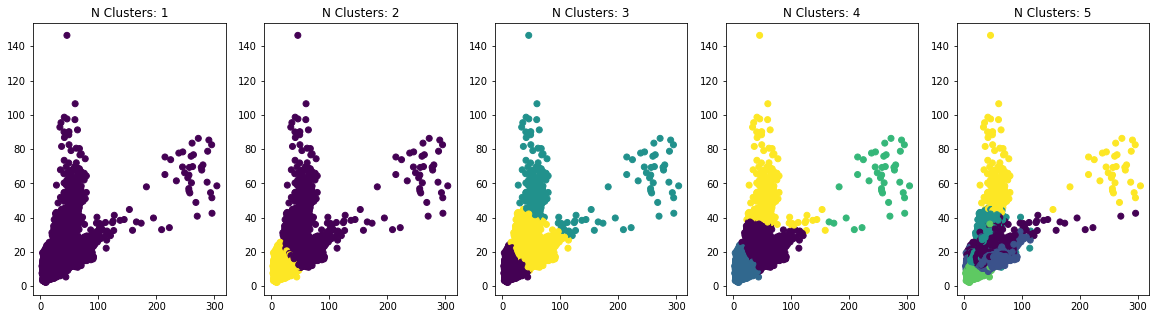

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df1['GR'], y=df1['NEU'], c=df1[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')